# 피마 인디언 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('dataset/pima-indians-diabetes.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum().sum()

0

In [5]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리 및 트레인/테스트 분할

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values, 
    stratify=df.iloc[:,-1].values, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

### 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [12]:
history = model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

0.5776
Epoch 2/200
10/10 - 0s - loss: 0.6867 - accuracy: 0.6630 - val_loss: 0.6903 - val_accuracy: 0.5948
Epoch 3/200
10/10 - 0s - loss: 0.6800 - accuracy: 0.6674 - val_loss: 0.6887 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6762 - accuracy: 0.6674 - val_loss: 0.6877 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6725 - accuracy: 0.6674 - val_loss: 0.6871 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6699 - accuracy: 0.6674 - val_loss: 0.6867 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6671 - accuracy: 0.6674 - val_loss: 0.6865 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6651 - accuracy: 0.6674 - val_loss: 0.6866 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6627 - accuracy: 0.6674 - val_loss: 0.6868 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6606 - accuracy: 0.6674 - val_loss: 0.6869 - val_accuracy: 0.5862
Epoch 11/200
10/10 - 0s - loss: 0.6592 - accuracy: 0.6674 - val_loss: 0.6874 - val_accuracy: 0.5862
E

In [13]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 998us/step - loss: 0.4399 - accuracy: 0.8021


[0.43988940119743347, 0.8020833134651184]

### 훈련과정 시각화

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

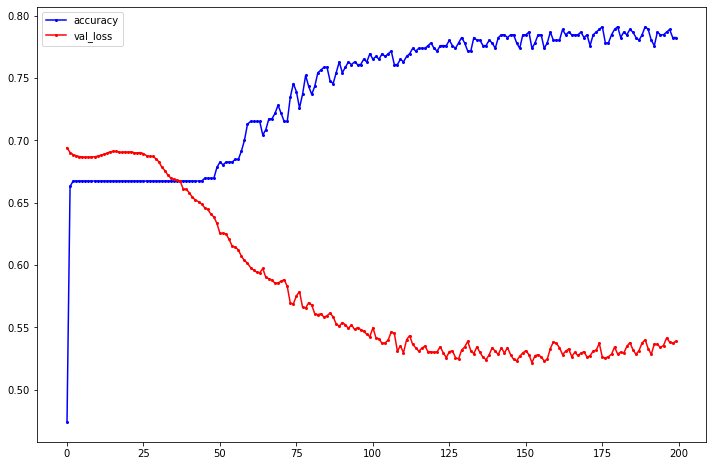

In [16]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()